In [1]:
import pandas as pd
import requests

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/total-ghg-emissions.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/total-ghg-emissions.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [2]:
df.head(2)


,Entity,Code,Year,annual_emissions_ghg_total_co2eq
0,Afghanistan,AFG,1850,7435743.5
1,Afghanistan,AFG,1851,7499858.5


In [3]:
df = df.sort_values("Year")
country = "India"

df = df.sort_values("Year")

df = df.rename(columns={"annual_emissions_ghg_total_co2eq": "GHG Emissions (CO2e)",
    "Entity": "Country"})

df = df[df["Country"] == country]

df["GHG Change %"] = df["GHG Emissions (CO2e)"].pct_change() * 100
df["GHG Change %"] = df["GHG Change %"].round(2)

filtered_df = df[(df["Country"] == country) & (df["Year"] >= 2005)]

clean_df = filtered_df[['Country', 'Year', 'GHG Emissions (CO2e)', 'GHG Change %']]

print(clean_df)


      Country  Year  GHG Emissions (CO2e)  GHG Change %
15467   India  2005          2.243356e+09          3.72
15468   India  2006          2.363338e+09          5.35
15469   India  2007          2.515728e+09          6.45
15470   India  2008          2.661096e+09          5.78
15471   India  2009          2.767514e+09          4.00
15472   India  2010          2.871956e+09          3.77
15473   India  2011          2.968743e+09          3.37
15474   India  2012          3.151704e+09          6.16
15475   India  2013          3.137217e+09         -0.46
15476   India  2014          3.246826e+09          3.49
15477   India  2015          3.325531e+09          2.42
15478   India  2016          3.419055e+09          2.81
15479   India  2017          3.486594e+09          1.98
15480   India  2018          3.682077e+09          5.61
15481   India  2019          3.692700e+09          0.29
15482   India  2020          3.515709e+09         -4.79
15483   India  2021          3.781196e+09       

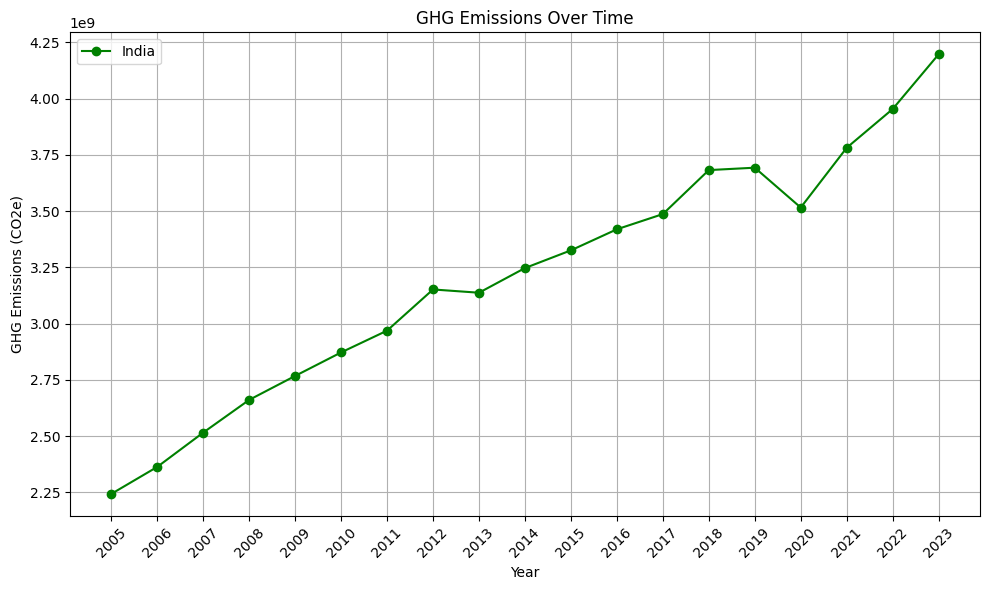

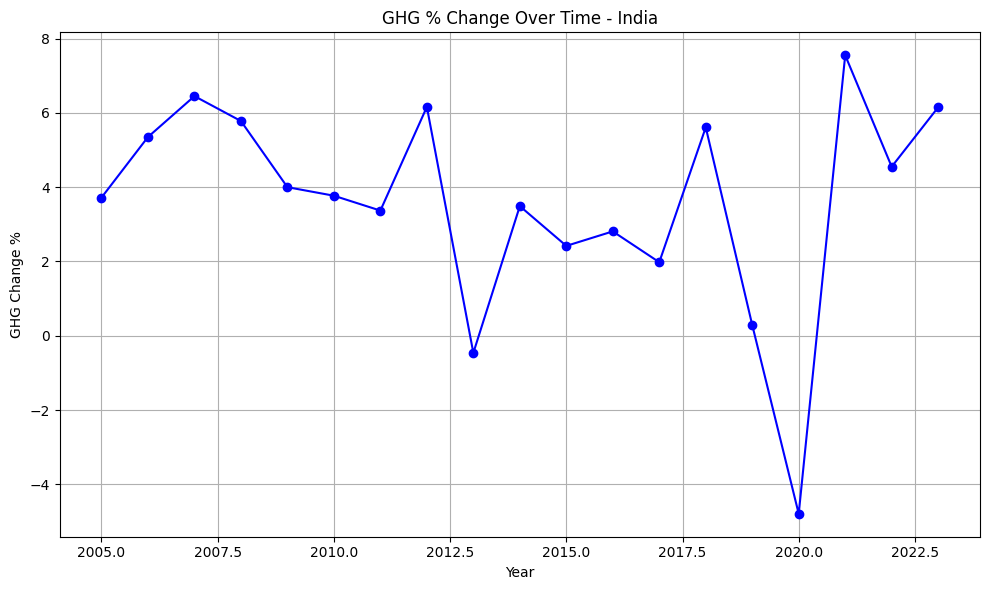

In [4]:
import matplotlib.pyplot as plt

def plot_ghg(clean_df, country_name, color="blue"):

    country_df = clean_df[clean_df["Country"] == country_name].sort_values("Year")


    plt.xticks(ticks=clean_df["Year"].unique(), rotation=45)

    # Plot line with label
    plt.plot(
        country_df["Year"],
        country_df["GHG Emissions (CO2e)"],
        marker='o',
        linestyle='-',
        color=color,
        label=country_name
    )

# India
plt.figure(figsize=(10, 6))
plot_ghg(clean_df, "India", color="green")

# Labels and legend
plt.xlabel("Year")
plt.ylabel("GHG Emissions (CO2e)")
plt.title("GHG Emissions Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(plot_ghg)


# % change plot

def plot_ghg_change(clean_df, country_name, color="blue"):
    # Filter for the selected country


    country_df = clean_df[clean_df["Country"] == country_name].sort_values("Year")

    plt.xticks(ticks=country_df["Year"], rotation=45)

    # Plot line with label
    plt.plot(
        country_df["Year"],
        country_df["GHG Change %"],
        marker='o',
        linestyle='-',
        color=color,
        label=country_name
    )

plt.figure(figsize=(10, 6))
plt.plot(clean_df["Year"], clean_df["GHG Change %"], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("GHG Change %")
plt.title("GHG % Change Over Time - India")

# add grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show(plot_ghg_change)






